Introduction to Neural Networks using keras<br>
In youtube tutorial <a href="https://www.youtube.com/playlist?list=PLZbbT5o_s2xrwRnXk_yCPtnqqo4_u2YGL">Keras - Python Deep Learning Neural Network API</a> on channel deeplizard

In [1]:
import numpy as np
from random import randint
from sklearn.preprocessing import MinMaxScaler

In [2]:
train_labels = []
train_samples = []

Creating Example data for demonstration, in real practice the actual data is used

<li>An experimental drug was tested on indivisuals from ages 13 to 100.</li>
<li>The trial has 2100 participants. Half were under 65 years old, half were over 65 year old.</li>
<li>95% of patients 65 or older experienced side effects.</li>
<li>95% of patients under 65 experienced no side effects.</li>

In [3]:
for i in range(1000):
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(1)
    
for i in range(50):
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(0)

In [4]:
train_samples[1:20]

[86, 14, 95, 21, 79, 33, 95, 41, 72, 33, 99, 24, 98, 19, 81, 42, 89, 32, 72]

In [5]:
train_labels[1:20]

[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]

In [6]:
# changing sample data and labels list to numpy array
train_samples = np.array(train_samples)
train_labels = np.array(train_labels)

In [7]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

C:\Users\xvcb\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [8]:
scaled_train_samples

array([[0.        ],
       [0.83908046],
       [0.01149425],
       ...,
       [0.77011494],
       [0.12643678],
       [0.59770115]])

In [9]:
import keras
from keras import backend as k
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

Using Theano backend.


In [10]:
k.backend()

'theano'

In [11]:
 model = Sequential([
     Dense(16, input_shape=(1,), activation='relu'),
     Dense(32, activation='relu'),
     Dense(2, activation='softmax')
 ])

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
model.fit(scaled_train_samples, train_labels, validation_split=0.1, batch_size=10, epochs = 20, shuffle=True, verbose=2)

Train on 1890 samples, validate on 210 samples
Epoch 1/20
 - 0s - loss: 0.4398 - acc: 0.8413 - val_loss: 1.1826 - val_acc: 0.5333
Epoch 2/20


C:\Users\xvcb\Anaconda3\lib\site-packages\theano\tensor\subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


 - 0s - loss: 0.1154 - acc: 0.9825 - val_loss: 2.0048 - val_acc: 0.5333
Epoch 3/20
 - 0s - loss: 0.0713 - acc: 0.9857 - val_loss: 2.5505 - val_acc: 0.5238
Epoch 4/20
 - 0s - loss: 0.0564 - acc: 0.9884 - val_loss: 3.0117 - val_acc: 0.5333
Epoch 5/20
 - 0s - loss: 0.0480 - acc: 0.9905 - val_loss: 3.3861 - val_acc: 0.5238
Epoch 6/20
 - 0s - loss: 0.0445 - acc: 0.9915 - val_loss: 3.7144 - val_acc: 0.5286
Epoch 7/20
 - 0s - loss: 0.0380 - acc: 0.9921 - val_loss: 4.0153 - val_acc: 0.5286
Epoch 8/20
 - 0s - loss: 0.0346 - acc: 0.9921 - val_loss: 4.2465 - val_acc: 0.5238
Epoch 9/20
 - 0s - loss: 0.0323 - acc: 0.9926 - val_loss: 4.4354 - val_acc: 0.5286
Epoch 10/20
 - 0s - loss: 0.0311 - acc: 0.9915 - val_loss: 4.5844 - val_acc: 0.5286
Epoch 11/20
 - 0s - loss: 0.0302 - acc: 0.9910 - val_loss: 4.6994 - val_acc: 0.5238
Epoch 12/20
 - 0s - loss: 0.0272 - acc: 0.9915 - val_loss: 4.7638 - val_acc: 0.5333
Epoch 13/20
 - 0s - loss: 0.0256 - acc: 0.9931 - val_loss: 4.9432 - val_acc: 0.5286
Epoch 14/20

### Preprocess test data

In [15]:
test_samples = []
test_labels = []

In [16]:
for i in range(200):
    random_younger = randint(13, 64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(1)
    
for i in range(10):
    random_younger = randint(13, 64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(0)

In [17]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)

In [18]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

C:\Users\xvcb\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [19]:
predictions = model.predict(scaled_test_samples, batch_size=10, verbose=0)

In [20]:
for i in predictions:
    print(i)

[0.71152234 0.28847766]
[7.3134261e-06 9.9999267e-01]
[9.9999881e-01 1.1818505e-06]
[1.6471042e-06 9.9999833e-01]
[1.0000000e+00 7.0750095e-13]
[0.10129865 0.89870137]
[1.0000000e+00 6.8577956e-12]
[0.00512467 0.9948753 ]
[9.9998605e-01 1.3946589e-05]
[2.0577889e-07 9.9999982e-01]
[1.0000000e+00 5.7860917e-11]
[1.0405065e-05 9.9998957e-01]
[9.9915397e-01 8.4600924e-04]
[2.8735644e-06 9.9999714e-01]
[1.0000000e+00 7.0750095e-13]
[7.5244920e-08 9.9999994e-01]
[1.0000000e+00 1.7432262e-13]
[2.1012157e-04 9.9978989e-01]
[9.9989176e-01 1.0821856e-04]
[1.6471042e-06 9.9999833e-01]
[1.0000000e+00 3.5118758e-13]
[9.6612303e-07 9.9999905e-01]
[1.0000000e+00 4.5225876e-12]
[0.00183823 0.9981618 ]
[0.99341935 0.00658064]
[4.3761668e-07 9.9999958e-01]
[1.0000000e+00 2.1234323e-09]
[7.3797302e-04 9.9926203e-01]
[1.0000000e+00 4.9846173e-13]
[0.01420306 0.9857969 ]
[1.0000000e+00 4.2951713e-14]
[0.10129865 0.89870137]
[1.0000000e+00 6.8577956e-12]
[1.2443375e-07 9.9999988e-01]
[9.999613e-01 3.869334

In [21]:
# rounded predictions
rounded_predictions = model.predict_classes(scaled_test_samples, batch_size=10, verbose=0)

In [22]:
rounded_predictions[1:30]

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1], dtype=int64)

 ## Confusion Matrix

In [23]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [24]:
cm = confusion_matrix(test_labels, rounded_predictions)

In [25]:
def plot_confusion_matrix(cm, classes,
                         normalize = False,
                         title = 'Confusion matrix',
                         cmap = plt.cm.Blues):
    """ This function prints and plots the confusion matrix.
    Normalization can be applied by setting 'normalize=True'."""
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    
    thresh = cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment = 'center',
                color='white' if cm[i,j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

Confusion matrix, without normalization
[[187  23]
 [  9 201]]


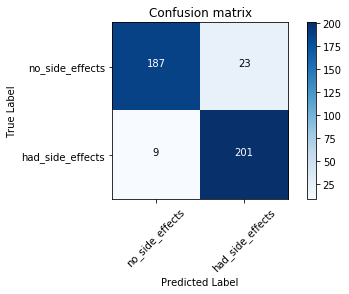

In [26]:
cm_plot_labels = ['no_side_effects', 'had_side_effects']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion matrix')

## Save and load model

1. <code>model.save()</code>

In [27]:
model.save('model_trial.h5')

This save function saves:
<li>The architecture of the model, allowing to recreate the model.</li>
<li>The weights of the model.</li>
<li>The training configuration (loss, optimizer).</li>
<li>The state of the optimizer, allowing to resume training exactly where we left off.</li>

In [28]:
from keras.models import load_model
new_model = load_model('model_trial.h5')

In [29]:
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [30]:
new_model.get_weights()

[array([[-0.43661407, -0.25614563,  0.7218026 , -0.29054213, -0.47191945,
          0.48486766,  0.7297359 ,  0.58028895,  0.7573558 ,  0.8147575 ,
         -0.32161242, -0.15060121,  0.3923052 ,  0.5480668 , -0.13079903,
         -0.35513046]], dtype=float32),
 array([ 0.34563038,  0.19309539, -0.16270326,  0.2620107 , -0.00599908,
        -0.16147716, -0.15068544,  0.01432387, -0.09032013, -0.1137273 ,
         0.26989758,  0.23267412, -0.10510585, -0.16709451, -0.00598389,
         0.2915045 ], dtype=float32),
 array([[-5.63083477e-02,  9.69363093e-01, -4.00061607e-02,
          8.77560198e-01, -7.56432712e-02, -9.49710190e-01,
          1.18512653e-01, -3.78989458e-01, -8.95962894e-01,
          8.47865582e-01, -4.87520486e-01, -1.00422382e+00,
          7.08520532e-01,  1.04544866e+00,  7.81100392e-01,
         -1.37976706e-01,  6.25277817e-01, -2.14185685e-01,
         -3.11106175e-01,  1.05422854e+00,  9.65618670e-01,
          9.47126687e-01, -9.94524658e-01,  6.11068487e-01,
 

In [31]:
new_model.optimizer

2. <code>model.to_json()</code>
<br>
If we only need to save the architecture of a model, and not its weights or its training configuration, we can use the following function to save the architecture only.

In [32]:
# save as JSON
json_string = model.to_json()

In [33]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential_1", "layers": [{"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_2", "trainable": true, "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": 

In [34]:
# model reconstruction from JSON
from keras.models import model_from_json
model_architecture = model_from_json(json_string)

In [35]:
model_architecture.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


<br>
3. <code>model.save_weights()</code><br><br>
If we only need to save the weights of a model, we can use the save_weights() function to save weights only.

In [36]:
model.save_weights('my_model_weights.h5')

In [37]:
model2 = Sequential([
    Dense(16, input_shape=(1,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation = 'softmax')
])

In [38]:
model2.load_weights('my_model_weights.h5')